In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('feeds.csv')

In [4]:
df.head()

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0


In [5]:
df.tail()

,current,voltage,temperature,humidity,vibration
198,5.8,232.0,59.22,68.0,0.0
199,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

current        4
voltage        4
temperature    4
humidity       4
vibration      4
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [9]:
df.isnull().sum()

current        0
voltage        0
temperature    0
humidity       0
vibration      0
dtype: int64

In [10]:
df.describe()

,current,voltage,temperature,humidity,vibration
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,5.683417,231.311558,61.063869,69.085427,0.070352
std,0.596434,3.411717,3.616215,0.851463,0.256384
min,5.000000,225.000000,55.200000,68.000000,0.000000
25%,5.300000,229.000000,58.780000,68.000000,0.000000
50%,5.700000,232.000000,59.880000,69.000000,0.000000
75%,5.900000,234.000000,63.340000,70.000000,0.000000
max,8.200000,235.000000,67.910000,70.000000,1.000000


In [15]:
df = df.astype({'humidity':'int', 'vibration' : 'int','voltage' : 'int'})

In [16]:
df.head()

,current,voltage,temperature,humidity,vibration
0,5.1,229,65.23,68,0
1,5.9,230,65.56,70,1
2,8.2,227,65.62,68,1
3,5.5,235,65.29,69,0
4,5.3,235,60.42,70,0


In [17]:
cols = ['current','voltage','temperature','humidity','vibration']

In [18]:
for i in cols:
  print(i +" : ")
  print(df[i].unique())

current : 
[5.1 5.9 8.2 5.5 5.3 5.2 5.7 5.8 6.  5.4 5.6 5. ]
voltage : 
[229 230 227 235 226 234 231 233 225 232]
temperature : 
[65.23 65.56 65.62 65.29 60.42 59.22 63.34 66.4  59.57 59.78 56.16 56.06
 63.6  61.48 67.91 63.58 64.31 59.73 67.89 61.82 67.17 58.89 56.25 55.2
 58.78 62.41 59.88 67.62 60.84 66.73 55.28 59.31 58.23 60.56 63.28 66.32]
humidity : 
[68 70 69]
vibration : 
[0 1]


In [19]:
df

,current,voltage,temperature,humidity,vibration
0,5.1,229,65.23,68,0
1,5.9,230,65.56,70,1
2,8.2,227,65.62,68,1
3,5.5,235,65.29,69,0
4,5.3,235,60.42,70,0
...,...,...,...,...,...
194,5.7,235,59.57,68,0
195,5.7,225,59.78,68,0
196,5.9,231,63.28,69,1
197,5.1,226,66.32,70,0


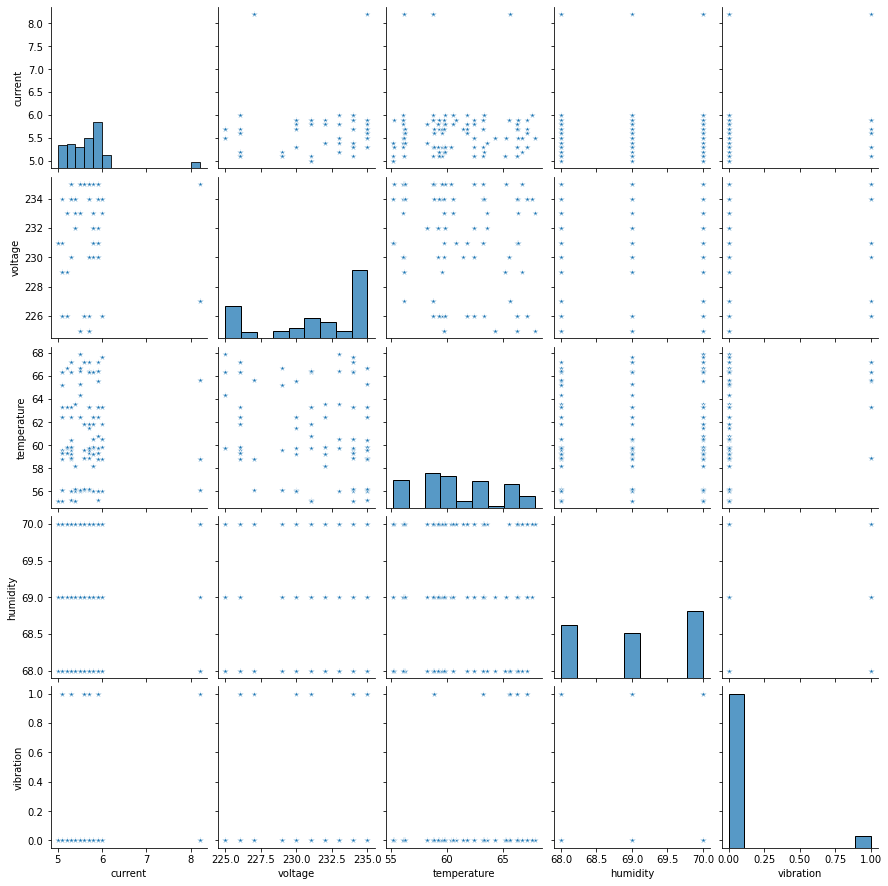

In [20]:
sns.pairplot(df, markers= '*')
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 0) 

In [22]:
kmeans.fit(df)

KMeans(init='random', n_clusters=2, random_state=0)

In [24]:
y_predicted = kmeans.predict(df)
y_predicted

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0])

In [25]:
col=['current', 'voltage',  'humidity', 'vibration','temperature']

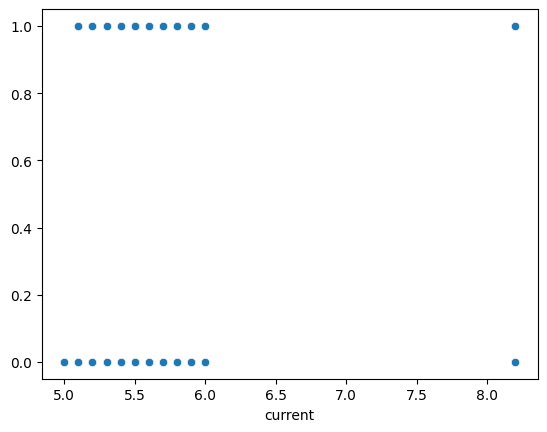

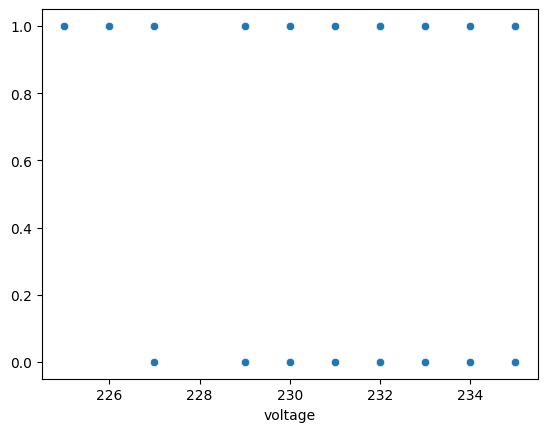

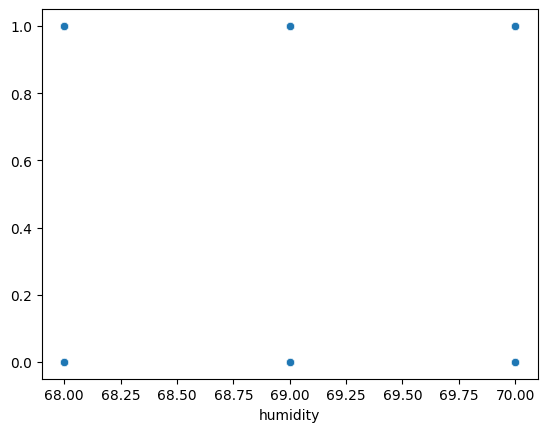

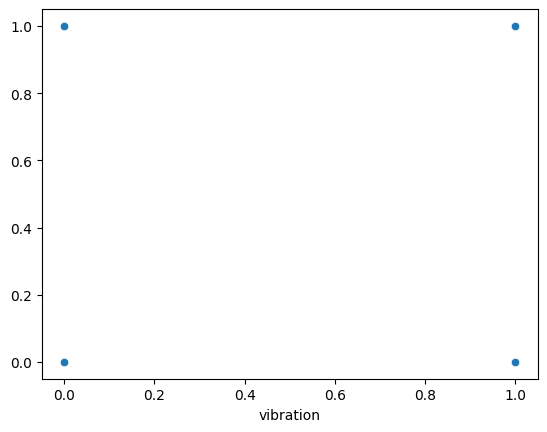

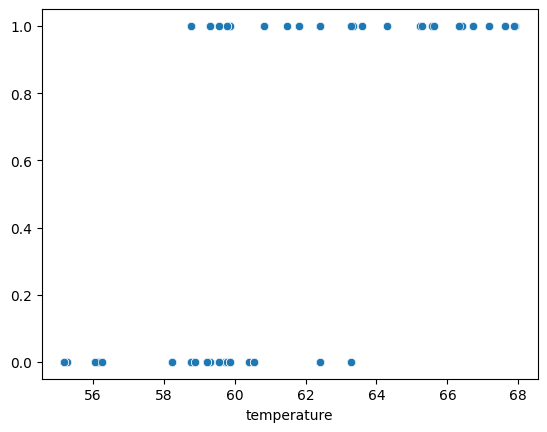

In [26]:
for i in col : 
  sns.scatterplot(x=df[i],y= y_predicted )
  plt.show()


In [22]:
kmeans.predict([[5.8 ,232.0 ,59.22 ,68.0 ,0.0]])

array([0])